In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:28<00:00, 33.3MB/s]
100% 1.06G/1.06G [00:28<00:00, 40.3MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile("/content/dogs-vs-cats.zip",'r')
zip_ref.extractall('/content')
zip_ref.close()

In [22]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout


In [10]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [11]:
#normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)


In [23]:
#create cnn model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [25]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 67s 100ms/step - loss: 1.1162 - accuracy: 0.6176 - val_loss: 0.6282 - val_accuracy: 0.6668
Epoch 2/10
625/625 [==============================] - 63s 101ms/step - loss: 0.5616 - accuracy: 0.7226 - val_loss: 0.8117 - val_accuracy: 0.5888
Epoch 3/10
625/625 [==============================] - 63s 101ms/step - loss: 0.5180 - accuracy: 0.7573 - val_loss: 0.4840 - val_accuracy: 0.7640
Epoch 4/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4101 - accuracy: 0.8150 - val_loss: 0.5770 - val_accuracy: 0.7150
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3508 - accuracy: 0.8469 - val_loss: 0.6335 - val_accuracy: 0.7366
Epoch 6/10
625/625 [==============================] - 64s 102ms/step - loss: 0.2788 - accuracy: 0.8834 - val_loss: 0.4856 - val_accuracy: 0.7912
Epoch 7/10
625/625 [==============================] - 64s 101ms/step - loss: 0.1996 - accuracy: 0.9205 - val_loss: 0.5316 - val_ac

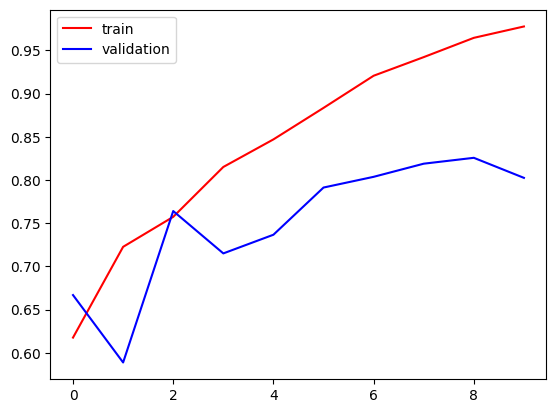

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

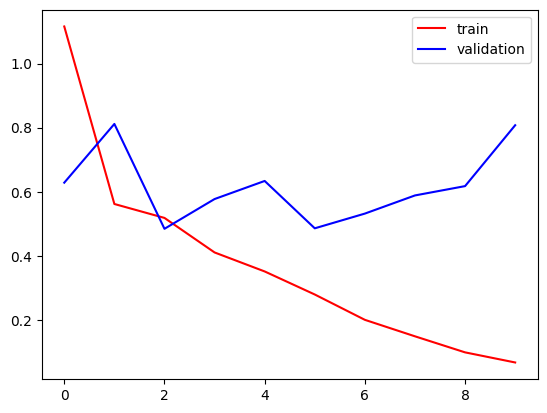

In [28]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [29]:
import cv2

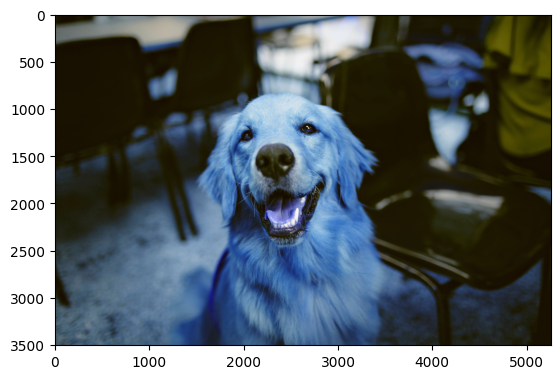

In [32]:
test_img = cv2.imread('/content/dog.jpg')
plt.imshow(test_img)

In [34]:
test_img.shape

(3505, 5257, 3)

In [35]:
test_img = cv2.resize(test_img,(256,256,))

In [36]:
test_input = test_img.reshape(1,256,256,3)

In [37]:
model.predict(test_input)

1/1 [==============================] - 1s 553ms/step


array([[1.]], dtype=float32)

Here array 1 indiactes that the image is of dog

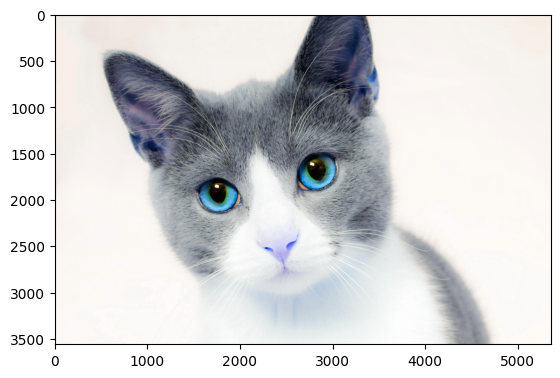

In [38]:
test_img2 = cv2.imread('/content/cat.jpg')
plt.imshow(test_img2)

In [39]:
test_img2.shape

(3560, 5360, 3)

In [40]:
test_img2 = cv2.resize(test_img2,(256,256,))

In [41]:
test_input2 = test_img2.reshape(1,256,256,3)

In [42]:
model.predict(test_input2)

1/1 [==============================] - 0s 20ms/step


array([[0.]], dtype=float32)

Here array 0 indicates that image is of cat